## PROJECT (20%) : "Subspecies of Oak Trees"


**Subject Code**: ISB46703  
**Subject Name**: Principles of Artificial Intelligence

**Group Members**:
- Nurul Amirah binti Azli (52213124666)
- Siti Ardini binti Md Roszaiman (52213124659) 
- Siti Raudah binti Kamsol (52213124671)

## 1. Loading and Exploring the Dataset

Found 6719 images belonging to 4 classes.
Found 1677 images belonging to 4 classes.


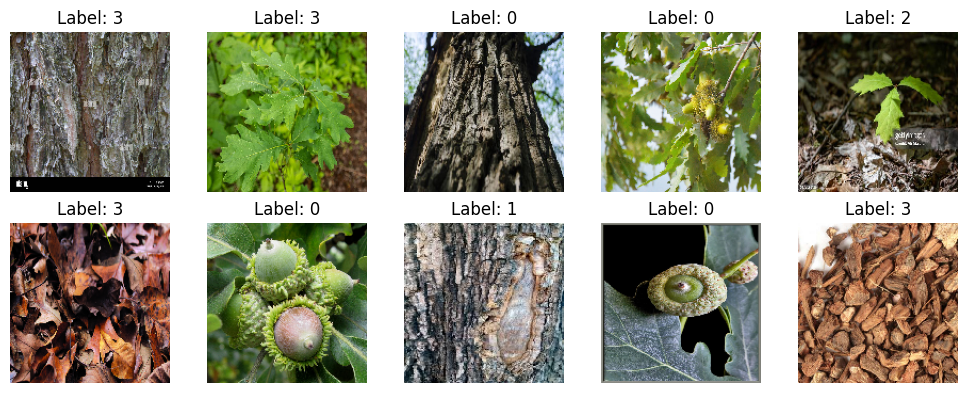

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Create an ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

# Load the training and validation data from directory
train_data = train_datagen.flow_from_directory(
    'Oak',  # Replace with the actual directory name
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=20,
    class_mode='binary',  # Binary classification
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'Oak',  # Replace with the actual directory name
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

# Display some images and labels
images, labels = next(train_data)  # Fetch one batch of data
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # Grid for images

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])  # Display image
    ax.set_title(f"Label: {int(labels[i])}")  # Binary label
    ax.axis('off')  # Hide axis

plt.tight_layout()
plt.show()


## 2. Building the Convolutional Neural Network

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 ## 3. Training and Evaluating the Model

In [12]:
# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,  # Number of batches per epoch
    epochs=10,  # Number of epochs (adjust as needed)
    validation_data=val_data,  # The validation data
    validation_steps=val_data.samples // val_data.batch_size  # Number of validation batches
)

# Save the model after training
model.save('oak_tree_model.keras')


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 27/335 ━━━━━━━━━━━━━━━━━━━━ 2:32 494ms/step - accuracy: 0.3479 - loss: 3.2937

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


335/335 ━━━━━━━━━━━━━━━━━━━━ 222s 658ms/step - accuracy: 0.3196 - loss: 1.6708 - val_accuracy: 0.3078 - val_loss: 1.3912
Epoch 2/10
  1/335 ━━━━━━━━━━━━━━━━━━━━ 1:52 338ms/step - accuracy: 0.3000 - loss: 1.3764

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


335/335 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.3000 - loss: 1.3764 - val_accuracy: 0.3042 - val_loss: 1.4044
Epoch 3/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 220s 655ms/step - accuracy: 0.3658 - loss: 1.3252 - val_accuracy: 0.3590 - val_loss: 1.3238
Epoch 4/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.3000 - loss: 1.5244 - val_accuracy: 0.3651 - val_loss: 1.3084
Epoch 5/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 234s 700ms/step - accuracy: 0.3865 - loss: 1.3031 - val_accuracy: 0.3596 - val_loss: 1.3249
Epoch 6/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.4500 - loss: 1.2334 - val_accuracy: 0.3669 - val_loss: 1.3210
Epoch 7/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 241s 720ms/step - accuracy: 0.4328 - loss: 1.2578 - val_accuracy: 0.4367 - val_loss: 1.2496
Epoch 8/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.6000 - loss: 0.9707 - val_accuracy: 0.4452 - val_loss: 1.2471
Epoch 9/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 242s 724ms/step - accuracy: 0.5276 - loss: 1.0964 - val

Found 1677 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


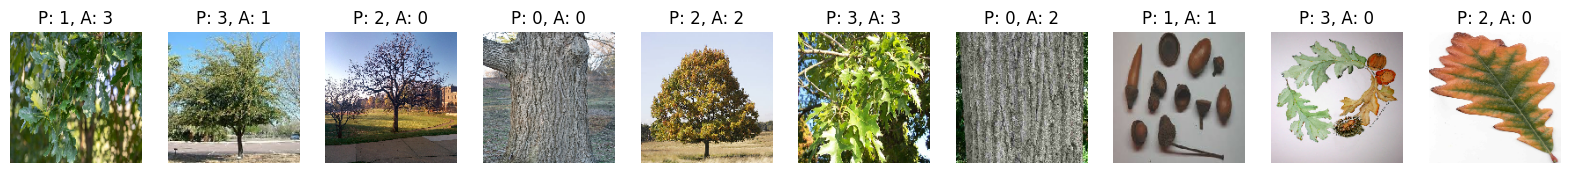

Accuracy = 40.0%


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the validation data (similar to your previous code)
train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

val_data = train_datagen.flow_from_directory(
    'Oak',  # Replace with the actual directory name
    target_size=(150, 150),
    batch_size=20,
    class_mode='sparse',  # For multi-class classification
    subset='validation'
)

# Load the trained model
model = load_model('oak_tree_model.keras')

# Choose a few random samples from the validation set
num_samples_to_display = 10  # Number of samples to display
sample_indices = np.random.choice(len(val_data), num_samples_to_display, replace=False)

count = 0

# Display the samples and their predicted and actual labels
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(20, 4))

for i, ax in enumerate(axes.flat):
    sample_index = sample_indices[i]
    image, label = val_data[sample_index]
    
    # Extract individual image from batch (since flow_from_directory returns batches)
    image = image[0]
    
    # Make prediction using the model
    prediction = model.predict(np.expand_dims(image, axis=0))  # Expand dims for prediction
    predicted_label = np.argmax(prediction[0])  # For multi-class classification, use argmax
    
    ax.imshow(image)
    ax.set_title(f"P: {predicted_label}, A: {int(label[0])}")  # P: predicted label, A: actual label
    ax.axis('off')
    
    # Count correct predictions
    if predicted_label == int(label[0]):
        count += 1

plt.show()

# Calculate accuracy of the predictions
accuracy = (count / num_samples_to_display) * 100
print(f"Accuracy = {accuracy}%")


Found 1677 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


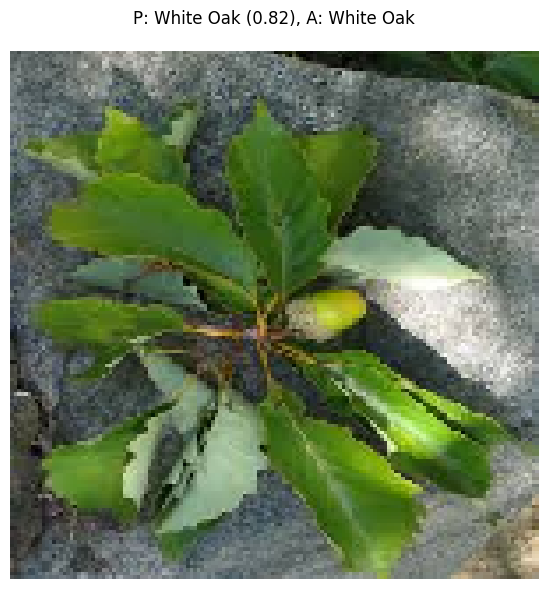

Accuracy on this sample: 100%


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model = load_model('oak_tree_model.keras')  # Replace with the correct model path

# Define the validation data (matching your training preprocessing)
train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

val_data = train_datagen.flow_from_directory(
    'Oak',  # Replace with the correct directory path
    target_size=(150, 150),
    batch_size=20,
    class_mode='sparse',  # For multi-class classification
    subset='validation'
)

# Define class labels
class_labels = ['Bur Oak', 'White Oak', 'Red Oak', 'Live Oak']

# Choose just one random sample from the validation set
sample_index = np.random.choice(len(val_data))  # Randomly pick one sample

# Get the image and its label
image, label = val_data[sample_index]

# Make prediction using the model
prediction = model.predict(np.expand_dims(image[0], axis=0))  # Expand dims for prediction
predicted_label = np.argmax(prediction, axis=1)[0]  # Multi-class classification
predicted_confidence = np.max(prediction)  # Confidence score (probability)
actual_label = int(label[0])

# Plot the image
fig, ax = plt.subplots(figsize=(6, 6))  # Single image plot
ax.imshow(image[0])

# Display the predicted and actual labels below the image
ax.set_title(f"P: {class_labels[predicted_label]} ({predicted_confidence:.2f}), A: {class_labels[actual_label]}", pad=20)
ax.axis('off')

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Calculate and print the accuracy for this single sample (it's either correct or not)
accuracy = 100 if predicted_label == actual_label else 0
print(f"Accuracy on this sample: {accuracy}%")


5. Visual the dataset to identify the class and labels

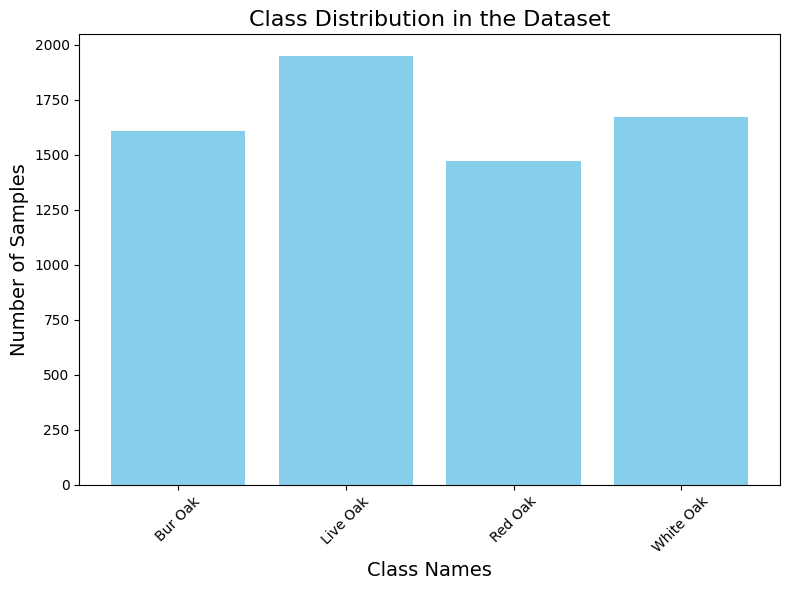

Class Names and Indices:
Bur Oak: 0
Live Oak: 1
Red Oak: 2
White Oak: 3


In [16]:
# Access class indices from the training data
class_indices = train_data.class_indices
class_names = list(class_indices.keys())  # Extract class names
class_counts = [0] * len(class_names)  # Initialize counts for each class

# Iterate through all batches to count samples per class
for _, labels in train_data:
    for label in labels:
        class_counts[int(label)] += 1
    if train_data.batch_index == 0:  # Stop after iterating all batches
        break

# Plot the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel("Class Names", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.title("Class Distribution in the Dataset", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print class details
print("Class Names and Indices:")
for class_name, index in class_indices.items():
    print(f"{class_name}: {index}")


6. Plotting Model Loss and Accuracy 

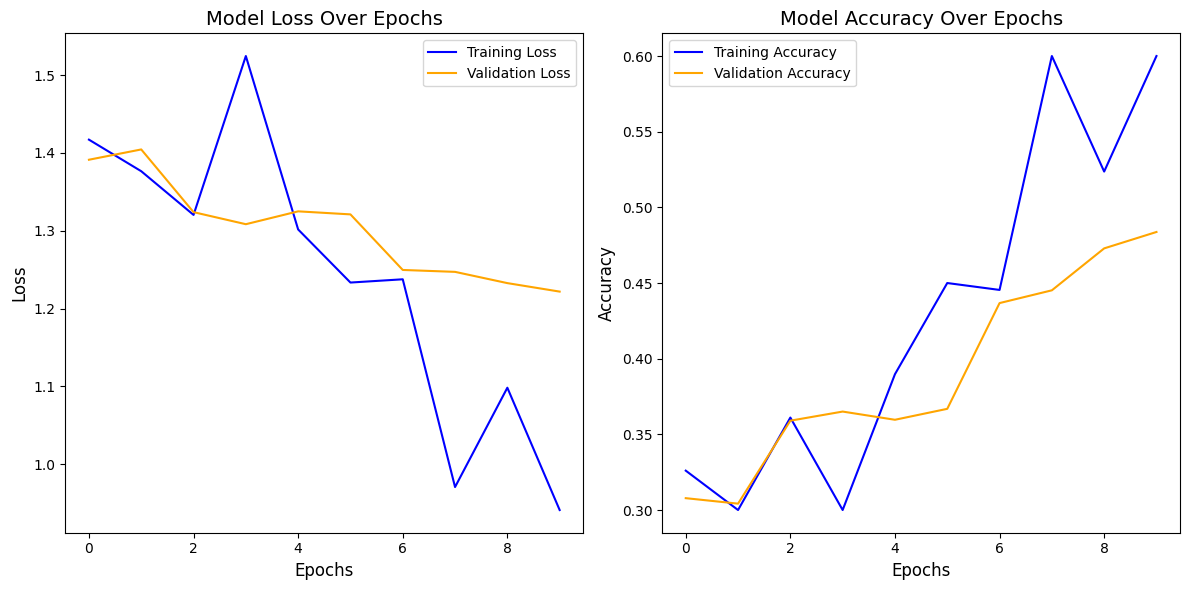

In [17]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss Over Epochs', fontsize=14)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


7. Displaying the Confusion Matrix 

 59/336 ━━━━━━━━━━━━━━━━━━━━ 1:10 256ms/step

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


336/336 ━━━━━━━━━━━━━━━━━━━━ 103s 307ms/step


<Figure size 800x600 with 0 Axes>

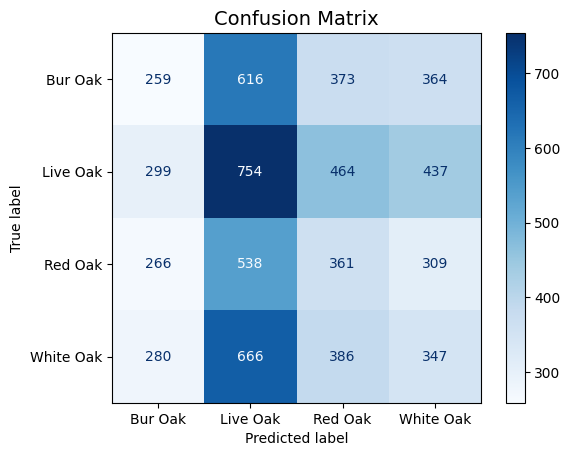

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get true labels and predictions
true_labels = train_data.classes  # True labels from the test dataset
predictions = model.predict(train_data)  # Predictions from the trained model
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14)
plt.show()


Evaluate Model Performance (test)

In [21]:
# Evaluate model performance on the test dataset
test_loss, test_accuracy = model.evaluate(train_data, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate mAP (Mean Average Precision)
from sklearn.metrics import average_precision_score

# Compute mAP for each class
average_precisions = []
for i, class_name in enumerate(train_data.class_indices.keys()):
    true_binary = (true_labels == i).astype(int)  # Convert true labels to binary format
    predicted_prob = predictions[:, i]  # Predicted probabilities for class i
    ap = average_precision_score(true_binary, predicted_prob)
    average_precisions.append(ap)
    print(f"Class: {class_name}, AP: {ap:.4f}")

# Overall mAP
mean_ap = np.mean(average_precisions)
print(f"Mean Average Precision (mAP): {mean_ap:.4f}")


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Loss: 0.8669
Test Accuracy: 0.6610
Class: Bur Oak, AP: 0.2377
Class: Live Oak, AP: 0.2917
Class: Red Oak, AP: 0.2290
Class: White Oak, AP: 0.2441
Mean Average Precision (mAP): 0.2506
